In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from glob import glob as glob
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap

%matplotlib inline

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=22)
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['ytick.major.size'] = 8

# FROM https://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html

In [2]:
photoelectric_str = '''0.0011117959933290651, 57891.029912084305
0.0014010173534971233, 33285.50825923238
0.0018348405368189592, 14964.912572947802
0.0019069298984431577, 145614.5417336074
0.0024029964990444326, 83723.74854790041
0.003147081208719532, 40028.92133245147
0.00499740756473659, 12443.870693106179
0.008908217149280745, 2515.3213192914914
0.01925390516865574, 243.08416926758716
0.03707128642435878, 30.04310441084007
0.068678386531319, 4.198995416677571
0.12723380361157383, 0.551873782238842
0.2858031069068535, 0.041704031652824734
0.550282591729173, 0.006198475179023413
0.7206768734806797, 0.0031514928088160303
1.284655293823131, 0.001107925060075425
2.6716418796213572, 0.00030456467152260543
7.562425126761533, 0.00008372374854790024
19.069298984431498, 0.000029433555704200057
44.51799177013164, 0.000011701708039627597
108.0121978709618, 0.000004947229046908133
272.3619554100611, 0.000001966837798799262
865.4430481661406, 6.114347933410248e-7
2545.996138265338, 2.0213335394789642e-7
6934.324866844131, 8.036084789550146e-8
19628.496248000713, 2.49819372272042e-8
40820.53206201894, 1.270157470151093e-8
78595.46532561838, 6.4578658744839994e-9
'''

In [3]:
compton_cross_str = '''0.0012008752882360187, 0.798136461633384
0.0019069298984431577, 1.388139890023392
0.003671584742789884, 2.5674118948361606
0.007346978798963367, 4.198995416677571
0.016503392239477985, 6.4578658744839865
0.033023906947137076, 7.303003077928456
0.07137670332946774, 7.303003077928456
0.18705379650078083, 6.0727134575699555
0.571902737978743, 3.9485638863891723
1.284655293823131, 2.5674118948361606
3.9277357297223765, 1.305350088555116
9.90412013427555, 0.7057724286521411
24.029964990444277, 0.33743483199353674
58.30292944888779, 0.1824431644628874
178.25676681125915, 0.06820683432969867
545.0064896286234, 0.028836374215697274
1224.2387132886852, 0.012964615582789621
3465.3647545907907, 0.005154258218763638
11893.613120972283, 0.0017039388536908453
31169.07036347925, 0.0007203884905167205
78595.46532561838, 0.0002864001847364911
'''

In [14]:
nuclear_pair_str = """1.284655293823131, 0.0019269323542741514
1.5576454802025859, 0.01078055077914056
2.6716418796213572, 0.0725327468358108
4.762382435388603, 0.20631939676603114
10.2932447931231, 0.4315338190587177
28.034882793694425, 0.798136461633384
92.58213606528581, 1.0854462150736672
242.6259441995544, 1.388139890023392
741.8103475479226, 1.388139890023392
2646.026213153171, 1.5698049613404432
9809.159563416233, 1.5698049613404432
49494.924881088395, 1.5698049613404432
84892.68952511027, 1.5698049613404432
"""

In [5]:
electron_pair_str = '''3.1169070363479316, 0.0007203884905167205
4.242433688236207, 0.002786787523785034
7.859546532561838, 0.011464290464416618
15.727247439295278, 0.0254992959751325
39.65759377382249, 0.05333385395623239
116.66634888915853, 0.07713302362219583
449.48961812434516, 0.10489903991675723
1944.0298489537633, 0.1186271171116621
8407.873955784495, 0.1261508577238834
36363.816375764014, 0.1341517798960902
84892.68952511027, 0.1341517798960902
'''

In [6]:
import StringIO

In [50]:
## Returns logE and logSigma (sigma in barns / atom)
def read_digitized_str(my_string):
    s = StringIO.StringIO(my_string)
    energies, cross = [], []
    for line in s:
        line = line.rstrip().split(', ')
        energies.append(float(line[0]))
        cross.append(float(line[1]))
    energies = np.log10(np.array(energies))
    cross = np.log10(np.array(cross))
    return energies, cross

In [53]:
photo_ens, photo_cross = read_digitized_str(photoelectric_str)       ##photoelectric cross section
compton_ens, compton_cross = read_digitized_str(compton_cross_str)   ## Compton cross section
nuc_ens, nuc_cross = read_digitized_str(nuclear_pair_str)            ## Nuclear pair production cross section
elec_ens, elec_cross = read_digitized_str(electron_pair_str)         ## Electron pair production cross section

In [95]:
def spline_cross(energies, cross, kind='cubic'):
    spline = interp1d(energies, cross, kind = kind)
    return spline

def fine_x(energies):
    return np.linspace(np.min(energies + 0.01), np.max(energies) + 0.01, 100)

In [96]:
photo_spline = spline_cross(photo_ens, photo_cross, kind='linear')
compton_spline = spline_cross(compton_ens, compton_cross)
nuc_spline = spline_cross(nuc_ens, nuc_cross)
elec_spline = spline_cross(elec_ens, elec_cross)

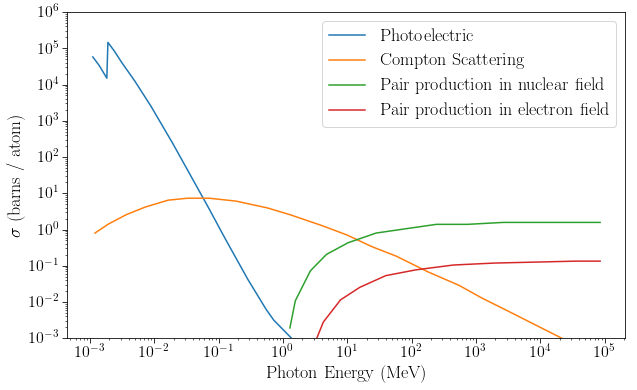

In [97]:
fig, ax = plt.subplots(figsize = (10,6))

plt.plot(10**photo_ens, 10**photo_cross, label = 'Photoelectric')
plt.plot(10**compton_ens, 10**compton_cross, label = "Compton Scattering")
plt.plot(10**nuc_ens, 10**nuc_cross, label = "Pair production in nuclear field")
plt.plot(10**elec_ens, 10**elec_cross, label = "Pair production in electron field")
#plt.plot(10**xnew, 10**nuc_spline(xnew))

plt.ylabel(r'$\sigma$ (barns / atom)')
plt.xlabel(r'Photon Energy (MeV)')
plt.legend(loc=1)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3, 1e6)
plt.show()

In [106]:
total_cross = np.zeros(150)
maxs = np.zeros((150,4))
total_energies = np.linspace(-2.95, 4.8, 150)
for i, en in enumerate(total_energies):
    try:
        total_cross[i] += 10**photo_spline(en)
        maxs[i][0] = photo_spline(en)
    except:
        pass
    try:
        total_cross[i] += 10**compton_spline(en)
        maxs[i][1] = compton_spline(en)
    except:
        pass
    try:
        total_cross[i] += 10**nuc_spline(en)
        maxs[i][2] = nuc_spline(en)
    except:
        pass
    try:
        total_cross[i] += 10**elec_spline(en)
        maxs[i][3] = elec_spline(en)
    except:
        pass
    total_cross[i] = np.log10(total_cross[i])

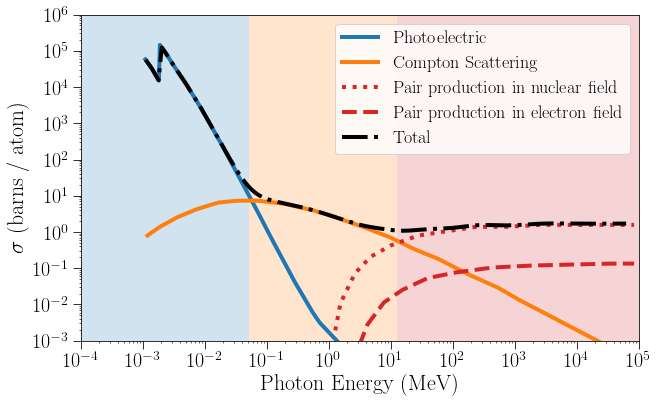

In [133]:
fig, ax = plt.subplots(figsize = (10,6))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
lw=4.

plt.plot(10**photo_ens, 10**photo_cross, label = 'Photoelectric', lw=lw)
plt.plot(10**compton_ens, 10**compton_cross, label = "Compton Scattering", lw=lw)
plt.plot(10**nuc_ens, 10**nuc_cross, label = "Pair production in nuclear field", lw=lw, c = colors[3], ls = ':')
plt.plot(10**elec_ens, 10**elec_cross, label = "Pair production in electron field", lw=lw, c = colors[3], ls = '--')
plt.plot(10**total_energies, 10**total_cross, c = 'k', ls = '-.', label = 'Total', lw=lw)

max_inds = np.argmax(maxs, axis=1)
switch_e = total_energies[np.where(max_inds[:-1] != max_inds[1:])[0]]

plt.axvspan(1e-4, 10**(switch_e[0]), facecolor = colors[0], alpha=0.2)
plt.axvspan(10**(switch_e[0]), 10**(switch_e[1]), facecolor = colors[1], alpha=0.2)
plt.axvspan(10**(switch_e[1]), 1e5, facecolor = colors[3], alpha=0.2)

plt.ylabel(r'$\sigma$ (barns / atom)')
plt.xlabel(r'Photon Energy (MeV)')
plt.legend(loc=1, fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3, 1e6)
plt.xlim(1e-4, 1e5)
plt.show()

In [114]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors

[u'#1f77b4',
 u'#ff7f0e',
 u'#2ca02c',
 u'#d62728',
 u'#9467bd',
 u'#8c564b',
 u'#e377c2',
 u'#7f7f7f',
 u'#bcbd22',
 u'#17becf']

In [112]:
switch_e = total_energies[np.where(max_inds[:-1] != max_inds[1:])[0]]

In [120]:
switch_e

array([-1.28557047,  1.10704698])

In [7]:
def read_hit_file(filename):
    text_file = open(filename, 'r')
    
    lines = text_file.readlines()
    hits = []
    for line in lines:
        if line.startswith('==='):
            continue
        if line.startswith('---'):
            hits.append([])
        if line.startswith('PixelHit'):
            line = line.rstrip().split()
            line = line[1:]
            for i in range(len(line)):
                line[i] = line[i].replace(',', '')
                line[i] = float(line[i])
            hits[-1].append(line)
    xhits, yhits, charge = [], [], []
    for i in range(len(hits)):
        hits[i] = zip(*hits[i])
        xhits.append(hits[i][0])
        yhits.append(hits[i][1])
        charge.append(hits[i][2])
    return xhits, yhits, charge

def track_length(x, y):
    x_dist_sq = np.power(np.max(x) - np.min(x),2.)
    y_dist_sq = np.power(np.max(y) - np.min(y),2.)
    return np.power(x_dist_sq + y_dist_sq, 0.5)

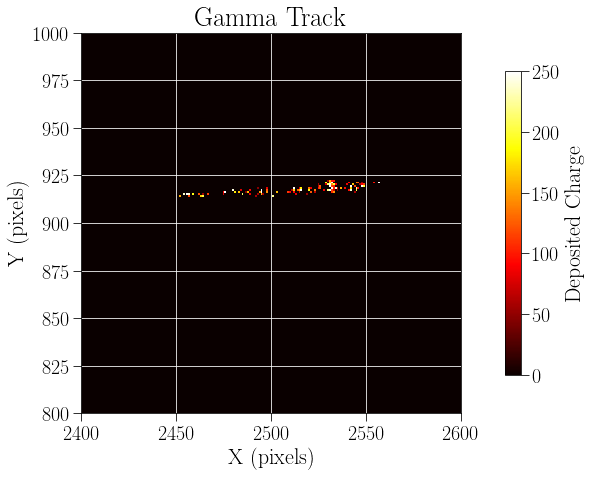

In [17]:
x, y, c = read_hit_file("/Users/APizzuto/Desktop/DECO_geant/DECO_allpix/source_shielding/output/gamma/10MeV_theta_75_phi_30.txt")

j = 0

image = np.zeros((3000, 3000))
for i in range(len(x[j])):
    image[int(y[j][i]), int(x[j][i])] = c[j][i]

title = "Gamma Track"
fig1 = plt.figure(1, figsize=(8,7))
ax = fig1.add_subplot(111)

my_cmap = ListedColormap(sns.color_palette("Blues"))
#my_cmap = ListedColormap(sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True)))
my_cmap = mpl.cm.hot

im = ax.imshow(image, cmap=my_cmap, interpolation="nearest", aspect="auto", vmax=250)
ax.set_xlim([2400,2600])
ax.set_ylim([800,1000])
ax.set_xlabel("X (pixels)")
ax.set_ylabel("Y (pixels)")
ax.set_title(title)

ax.grid(color="#ffffff")
cb = fig1.colorbar(im, orientation="vertical",
                       shrink=0.8,
                       fraction=0.05,
                       pad=0.1)
label = "Deposited Charge"
cb.set_label(label)

In [34]:
col_names =  ['Energy', 'Theta (degrees)', 'Phi', 'Deposited Charge ($N_{e^{-}}$)', 
              'Energy (GeV)', 'Track Length (pixels)', 'Charge per unit length']
df_energies  = pd.DataFrame(columns = col_names)

ens = ['10keV', '31.6keV', '100keV', '316keV', '1MeV', '3.16MeV', 
       '10MeV', '31.6MeV', '100MeV', '316MeV', '1GeV', '3.16GeV', '10GeV']
en_float = np.logspace(-2., 4, 13)

angles = ['0', '15', '30', '45', '60', '75']

counter = 0
for i, en in enumerate(ens):
    for k, ang in enumerate(angles):
        x, y, c = read_hit_file("/Users/APizzuto/Desktop/DECO_geant/DECO_allpix/source_shielding/output/gamma/{}_theta_{}_phi_30_highstats.txt".format(en, ang))    
        try:
            for j in range(len(x)):
                charge = np.sum(c[j])
                length = track_length(x[j], y[j])
                dE_dX = charge / np.power(length**2 + (26.3 / 0.9)**2, 0.5)
                df_energies.loc[counter] = [en, ang, '30', charge, en_float[i], length, dE_dX]
                counter += 1
        except:
            continue

In [35]:
df_energies

,Energy,Theta (degrees),Phi,Deposited Charge ($N_{e^{-}}$),Energy (GeV),Track Length (pixels),Charge per unit length
0,10keV,0,30,3984.0071,0.010000,12.806248,124.870365
1,31.6keV,0,30,8455.3321,0.031623,12.529964,265.930623
2,31.6keV,0,30,418.0362,0.031623,2.828427,14.238879
3,31.6keV,0,30,832.3740,0.031623,1.414214,28.450983
4,31.6keV,0,30,9331.6370,0.031623,9.433981,303.889857
5,31.6keV,0,30,7051.0524,0.031623,10.630146,226.753797
6,31.6keV,0,30,10605.0088,0.031623,13.892444,327.755883
7,31.6keV,0,30,11287.8028,0.031623,18.601075,325.859181
8,31.6keV,0,30,2863.4232,0.031623,8.062258,94.458788
9,31.6keV,0,30,8776.6047,0.031623,13.453624,272.815672


1476
52235
282615


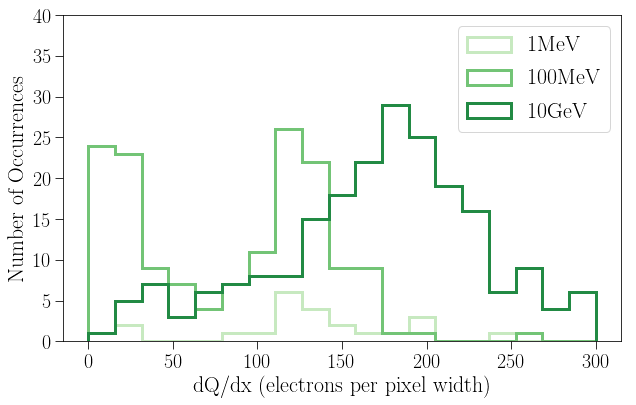

In [49]:
fig, ax = plt.subplots(figsize = (10,6))

cmap = sns.color_palette("Greens", 3)
h = []
for i, en in enumerate(ens[4::4]):
    num_non_zero = np.sum(np.where(df_energies['Energy']==en))
    print num_non_zero
    h.append(plt.hist(df_energies['Charge per unit length'][df_energies['Energy']==en], histtype = 'step',
            lw = 3., label = en, color = cmap[i], bins = np.linspace(0., 300, 20)))
    h[-1][0][0] = h[-1][0][0] + (1000. - num_non_zero)
plt.legend(ncol=1, loc=1)
plt.xlabel("dQ/dx (electrons per pixel width)")
plt.ylabel("Number of Occurrences")
plt.ylim(0,40.)
plt.show()